In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#ignore all the pre-existing comments
#this is a final project / PoC / code is not designed for Prod - not pretty


## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12


In [2]:
# Read the csv file into a pandas DataFrame
calhouse = pd.read_csv('flights-clean.csv')
calhouse.head(50)

,airline,orignum,deptime,depdelay,arrdelay,cancelled,distance
0,19805.0,74.0,854.0,0.0,2.0,0.0,2475.0
1,19805.0,76.0,944.0,14.0,0.0,0.0,2475.0
2,19805.0,74.0,1224.0,0.0,39.0,0.0,2475.0
3,19805.0,76.0,1240.0,25.0,0.0,0.0,2475.0
4,19805.0,68.0,1300.0,0.0,15.0,0.0,3784.0
5,19805.0,79.0,1901.0,126.0,95.0,0.0,3711.0
6,19805.0,68.0,1410.0,125.0,138.0,0.0,3711.0
7,19805.0,72.0,1659.0,4.0,0.0,0.0,3784.0
8,19805.0,74.0,648.0,0.0,19.0,0.0,2475.0
9,19805.0,76.0,2156.0,21.0,1.0,0.0,2475.0


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = calhouse.orignum.values.reshape(-1, 1)
y = calhouse.depdelay.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (483499, 1) (483499, 1)


array([[74.],
       [76.],
       [74.],
       ...,
       [83.],
       [83.],
       [83.]])

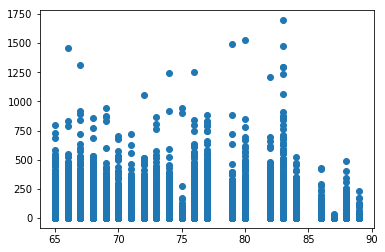

In [4]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.00172513]]
y-axis intercept:  [11.24637002]


In [8]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[65.]]
Max X Value: [[89.]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")
### END SOLUTION

Min Y Value: [[11.13423673]]
Max Y Value: [[11.09283367]]


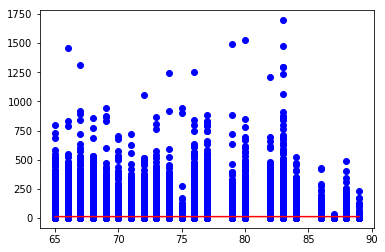

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION